In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
excel_file_path = 'Merger_information.xlsx'

all_dfs = pd.read_excel(excel_file_path, sheet_name=None)

In [4]:
# Display the keys (worksheet names) in the dictionary
print("Worksheet names:", list(all_dfs.keys()))

Worksheet names: ['fees', 'fees_merged', 'fees_non_merged', 'financial_performance', 'financial_merged', 'financial_non_merged', 'fund_profile', 'fund_profile_merged', 'fund_profile_non_merged']


In [5]:
# Access a specific dataframe by its worksheet name
fund_profile = all_dfs['fund_profile']  
# Access a specific dataframe by its worksheet name
fund_profile_merged = all_dfs['fund_profile_merged']  

# Access a specific dataframe by its worksheet name
fund_profile_non_merged = all_dfs['fund_profile_non_merged']

In [6]:
# Access a specific dataframe by its worksheet name
financial_performance = all_dfs['financial_performance']  
# Access a specific dataframe by its worksheet name
financial_performance_merged = all_dfs['financial_merged']  

# Access a specific dataframe by its worksheet name
financial_performance_non_merged = all_dfs['financial_non_merged']

In [7]:
financial_performance.columns

Index(['Period', 'Fund name', 'ABN', 'RSE Regulatory classification',
       'Fund type', 'RSE Membership base', 'Fund's RSE licensee',
       'RSE licensee ownership type', 'RSE licensee profit status',
       'RSE licensee board structure', 'RSE Balance date', 'Duration',
       'RSE Wind up date', 'Net assets at beginning of period',
       'Employer contributions ', 'of which: Super guarantee contributions',
       'of which: Salary sacrifice contributions', 'Personal contributions',
       'Government co-contributions', 'Low income super contributions',
       'Other member contributions', 'Member contributions',
       'Defined benefit contributions', 'Contribution tax and surcharge',
       'Other members’ benefits flows in', 'Total Members' benefit flows in',
       'Inward rollovers', 'of which: SMSF rollovers',
       'of which: Successor fund transfers', 'Outward rollover',
       'of which: SMSF rollovers.1', 'of which: Successor fund transfers.1',
       'Net rollovers', '

In [8]:
fund_profile.columns

Index(['Period', 'Fund name', 'ABN', 'RSE Regulatory classification',
       'Fund type', 'RSE Membership base', 'Fund's RSE licensee',
       'RSE licensee ownership type', 'RSE licensee profit status',
       'RSE licensee board structure', 'RSE Balance date', 'Duration',
       'RSE Wind up date', 'Total assets',
       'Proportion of benefits which are defined benefits',
       'Number of investment options', 'Number of MySuper products authorised',
       'Proportion of total assets in default or MySuper strategy',
       'Net members' benefits outflow ratio', 'Investment expenses ratio',
       'Operating expense ratio', 'One-year\nrate of return',
       'Five-year\nrate of return', 'Ten-year\nrate of return',
       'Total number of member accounts', 'Total members' benefits',
       'Average member account balance',
       'Growth in number of member accounts'],
      dtype='object')

In [9]:
# Create a new DataFrame with the selected columns
selected_columns = ['Period', 'Fund name', 'ABN', 'Total assets']
new_fund_profile = fund_profile[selected_columns].copy()

# Print or use the new DataFrame 'new_fund_profile'
print(new_fund_profile)

         Period                                        Fund name          ABN  \
0    2022-06-30               Alcoa of Australia Retirement Plan  80928800255   
1    2022-06-30                                        AMG Super  30099320583   
2    2022-06-30                                   AMP Super Fund  78421957449   
3    2022-06-30                       Aracon Superannuation Fund  40586548205   
4    2022-06-30            ASGARD Independence Plan Division Two  90194410365   
...         ...                                              ...          ...   
1496 2014-06-30  Wealth Personal Superannuation and Pension Fund  92381911598   
1497 2014-06-30    Westpac Mastertrust - Superannuation Division  81236903448   
1498 2014-06-30             Westpac Personal Superannuation Fund  36369876939   
1499 2014-06-30              Worsley Alumina Superannuation Fund  51469547458   
1500 2014-06-30                Zurich Master Superannuation Fund  33632838393   

     Total assets  
0      

In [10]:
import pandas as pd

# Assuming you have the 'new_fund_profile' DataFrame
# new_fund_profile = ...

# Convert the 'Total assets' column to numeric (if it's not already)
new_fund_profile['Total assets'] = pd.to_numeric(new_fund_profile['Total assets'], errors='coerce')

# Group by 'Period' and calculate the total assets for each period
total_assets_per_period = new_fund_profile.groupby('Period')['Total assets'].sum()

# Merge the total assets back into the original DataFrame
new_fund_profile = new_fund_profile.merge(total_assets_per_period.reset_index(), on='Period', suffixes=('', '_total'))

# Calculate the market share for each fund using 'ABN' and 'Fund name'
new_fund_profile['Market Share'] = (new_fund_profile['Total assets'] / new_fund_profile['Total assets_total']) * 100

# Print the result
print(new_fund_profile[['Period', 'Fund name', 'ABN', 'Total assets', 'Market Share']])


         Period                                        Fund name          ABN  \
0    2022-06-30               Alcoa of Australia Retirement Plan  80928800255   
1    2022-06-30                                        AMG Super  30099320583   
2    2022-06-30                                   AMP Super Fund  78421957449   
3    2022-06-30                       Aracon Superannuation Fund  40586548205   
4    2022-06-30            ASGARD Independence Plan Division Two  90194410365   
...         ...                                              ...          ...   
1496 2014-06-30  Wealth Personal Superannuation and Pension Fund  92381911598   
1497 2014-06-30    Westpac Mastertrust - Superannuation Division  81236903448   
1498 2014-06-30             Westpac Personal Superannuation Fund  36369876939   
1499 2014-06-30              Worsley Alumina Superannuation Fund  51469547458   
1500 2014-06-30                Zurich Master Superannuation Fund  33632838393   

      Total assets  Market 

In [11]:
# Convert the 'Total assets' column to numeric (if it's not already)
new_fund_profile['Total assets'] = pd.to_numeric(new_fund_profile['Total assets'], errors='coerce')

# Calculate the market share for each fund using 'ABN' and 'Fund name'
new_fund_profile['Market Share'] = (new_fund_profile['Total assets'] / new_fund_profile.groupby('Period')['Total assets'].transform('sum')) * 100

# Calculate the sum of market shares for each time period
sum_market_share = new_fund_profile.groupby('Period')['Market Share'].sum()

# Print the sum of market shares for each time period
print(sum_market_share)

Period
2014-06-30    100.0
2015-06-30    100.0
2016-06-30    100.0
2017-06-30    100.0
2018-06-30    100.0
2019-06-30    100.0
2020-06-30    100.0
2021-06-30    100.0
2022-06-30    100.0
Name: Market Share, dtype: float64


**Calculating the change in market share for each fund over the time-series**

In [12]:
# Convert the 'Total assets' column to numeric (if it's not already)
new_fund_profile['Total assets'] = pd.to_numeric(new_fund_profile['Total assets'], errors='coerce')

# Group by 'ABN' and 'Fund name'
grouped = new_fund_profile.groupby(['ABN', 'Fund name'])

# Calculate the market share for the first period
first_period_market_share = grouped['Market Share'].first().reset_index()

# Calculate the market share for the last period
last_period_market_share = grouped['Market Share'].last().reset_index()

# Merge the first and last period market shares
market_share_change = first_period_market_share.merge(last_period_market_share, on=['ABN', 'Fund name'], suffixes=('_first', '_last'))

# Calculate the change in market share
market_share_change['Change in Market Share'] = market_share_change['Market Share_last'] - market_share_change['Market Share_first']

# Print the change in market share for each fund
print(market_share_change[['ABN', 'Fund name', 'Change in Market Share']])

             ABN                                          Fund name  \
0    11260931967                   Linfox Staff Superannuation Fund   
1    11789425178                                        Mercy Super   
2    12727521796                     Quadrant Superannuation Scheme   
3    12737334298                                         Club Super   
4    13355603448                            ING Superannuation Fund   
..           ...                                                ...   
218  98172275725                                         Care Super   
219  98350952022                                  SPSL Master Trust   
220  98415348576  Macquarie University Professorial Superannuati...   
221  98438661856                Rio Tinto Staff Superannuation Fund   
222  98503137921                       Sunsuper Superannuation Fund   

     Change in Market Share  
0                       NaN  
1                  0.005969  
2                  0.003916  
3                  0.008149

Plotting market share

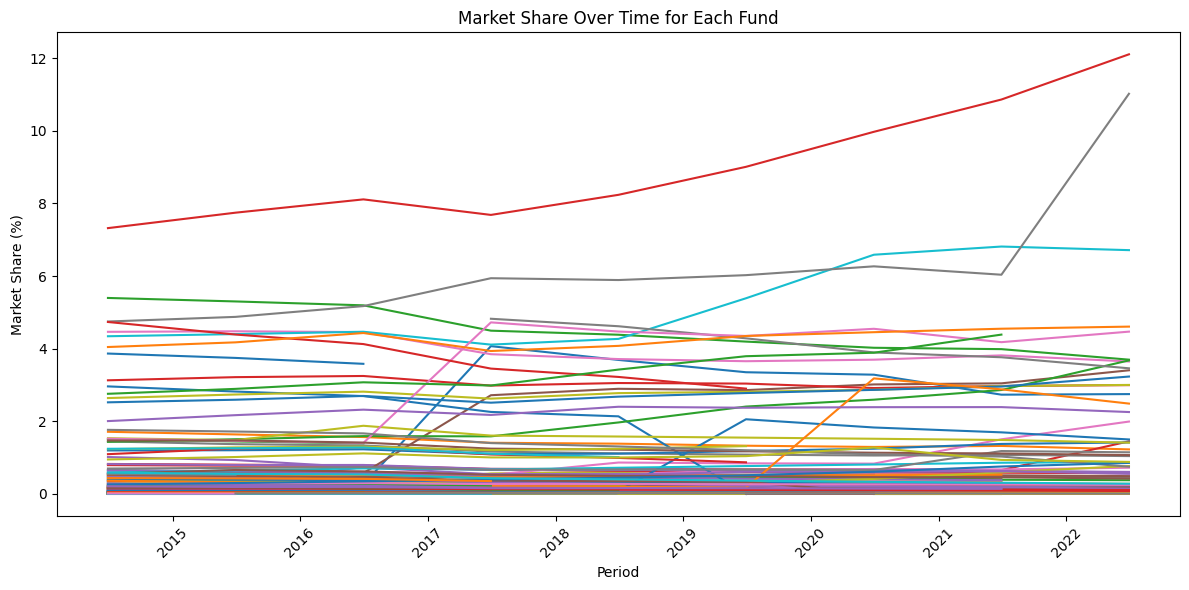

In [13]:
import matplotlib.pyplot as plt

# Assuming you have the 'new_fund_profile' DataFrame with 'ABN', 'Fund name', 'Period', and 'Market Share'
# new_fund_profile = ...

# Convert the 'Total assets' column to numeric (if it's not already)
new_fund_profile['Total assets'] = pd.to_numeric(new_fund_profile['Total assets'], errors='coerce')

# Group by 'ABN' and 'Fund name'
grouped = new_fund_profile.groupby(['ABN', 'Fund name'])

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot market share over time for each fund
for name, group in grouped:
    ax.plot(group['Period'], group['Market Share'], label=name)

# Set labels and title
ax.set_xlabel('Period')
ax.set_ylabel('Market Share (%)')
ax.set_title('Market Share Over Time for Each Fund')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Market Share for 2022

In [14]:
# Filter the DataFrame for data from the year 2022
funds_2022 = new_fund_profile[new_fund_profile['Period'].dt.year == 2022]

# Sort the filtered DataFrame by 'Market Share' in descending order
sorted_funds_2022 = funds_2022.sort_values(by='Market Share', ascending=False)

# Print the sorted DataFrame for 2022
print(sorted_funds_2022[['ABN', 'Fund name', 'Market Share']])

             ABN                                          Fund name  \
10   65714394898                                    AustralianSuper   
9    60905115063                        Australian Retirement Trust   
14   53226460365                                        Aware Super   
106  91385943850                                           Unisuper   
85   74172177893                Public Sector Superannuation Scheme   
..           ...                                                ...   
59   32448411930               Manildra Flour Mills Retirement Fund   
95   24276733959                 Star Portfolio Superannuation Fund   
97   73703878235                     SuperTrace Superannuation Fund   
102  68672265781  The University of Wollongong Professorial Supe...   
108  33632838393                  Zurich Master Superannuation Fund   

     Market Share  
10      12.104512  
9       11.018203  
14       6.712434  
106      4.606544  
85       4.468417  
..            ...  
59     

In [15]:
sorted_funds_2022.head(20)

,Period,Fund name,ABN,Total assets,Total assets_total,Market Share
10,2022-06-30,AustralianSuper,65714394898,271748380.0,2.245017e+09,12.104512
9,2022-06-30,Australian Retirement Trust,60905115063,247360562.0,2.245017e+09,11.018203
14,2022-06-30,Aware Super,53226460365,150695306.0,2.245017e+09,6.712434
106,2022-06-30,Unisuper,91385943850,103417710.0,2.245017e+09,4.606544
85,2022-06-30,Public Sector Superannuation Scheme,74172177893,100316721.0,2.245017e+09,4.468417
21,2022-06-30,Colonial First State FirstChoice Superannuatio...,26458298557,82993523.0,2.245017e+09,3.696788
47,2022-06-30,HOSTPLUS Superannuation Fund,68657495890,82537867.0,2.245017e+09,3.676492
90,2022-06-30,Retirement Wrap,39827542991,81875971.0,2.245017e+09,3.647009
68,2022-06-30,MLC Super Fund,70732426024,77653236.0,2.245017e+09,3.458915
66,2022-06-30,Military Superannuation & Benefits Fund No 1,50925523120,76419313.0,2.245017e+09,3.403952


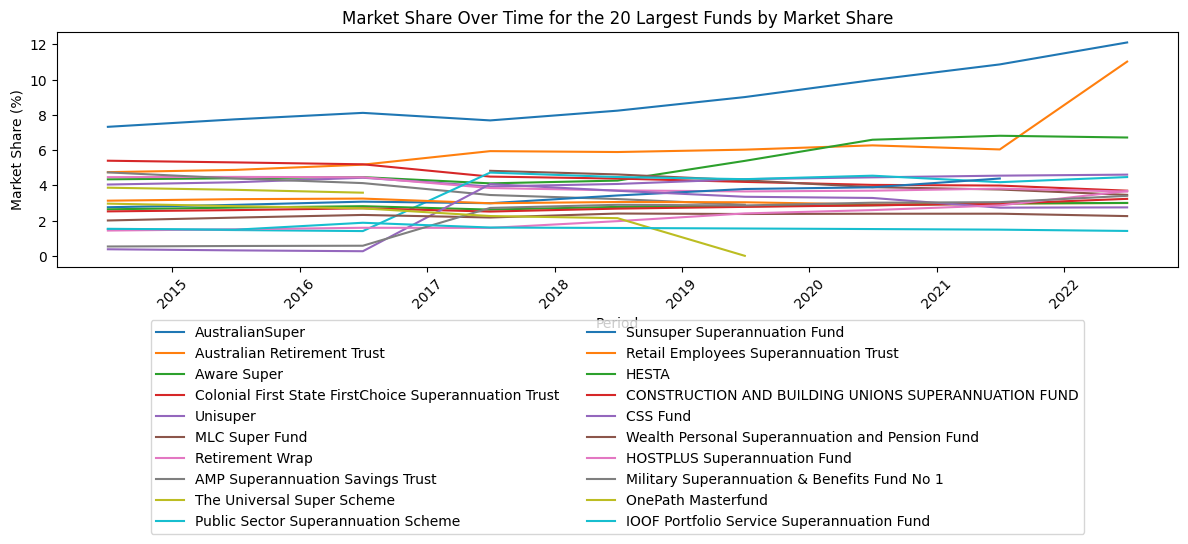

In [16]:

# Convert the 'Total assets' column to numeric (if it's not already)
new_fund_profile['Total assets'] = pd.to_numeric(new_fund_profile['Total assets'], errors='coerce')

# Group by 'ABN' and 'Fund name'
grouped = new_fund_profile.groupby(['ABN', 'Fund name'])

# Calculate the mean market share for each fund
mean_market_share = grouped['Market Share'].mean()

# Get the top 20 funds by mean market share
top_20_funds = mean_market_share.nlargest(20)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot market share over time for the top 20 funds
for name in top_20_funds.index:
    group = grouped.get_group(name)
    ax.plot(group['Period'], group['Market Share'], label=name[1])  # Use name[1] for the fund name

# Set labels and title
ax.set_xlabel('Period')
ax.set_ylabel('Market Share (%)')
ax.set_title('Market Share Over Time for the 20 Largest Funds by Market Share')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Calculating HHI Index

In [17]:
new_fund_profile

,Period,Fund name,ABN,Total assets,Total assets_total,Market Share
0,2022-06-30,Alcoa of Australia Retirement Plan,80928800255,2172137.0,2.245017e+09,0.096754
1,2022-06-30,AMG Super,30099320583,1553647.0,2.245017e+09,0.069204
2,2022-06-30,AMP Super Fund,78421957449,55838175.0,2.245017e+09,2.487205
3,2022-06-30,Aracon Superannuation Fund,40586548205,595099.0,2.245017e+09,0.026508
4,2022-06-30,ASGARD Independence Plan Division Two,90194410365,16839656.0,2.245017e+09,0.750090
...,...,...,...,...,...,...
1496,2014-06-30,Wealth Personal Superannuation and Pension Fund,92381911598,21922794.0,1.093298e+09,2.005198
1497,2014-06-30,Westpac Mastertrust - Superannuation Division,81236903448,5787189.0,1.093298e+09,0.529333
1498,2014-06-30,Westpac Personal Superannuation Fund,36369876939,NaN,1.093298e+09,NaN
1499,2014-06-30,Worsley Alumina Superannuation Fund,51469547458,282182.0,1.093298e+09,0.025810


In [18]:

# Convert the 'Total assets_total' and 'Total assets' columns to numeric (if not already)
new_fund_profile['Total assets_total'] = pd.to_numeric(new_fund_profile['Total assets_total'], errors='coerce')
new_fund_profile['Total assets'] = pd.to_numeric(new_fund_profile['Total assets'], errors='coerce')

# Group by 'Period', 'ABN', and 'Fund_name' and calculate the HHI
def calculate_hhi(group):
    total_assets_period = group['Total assets_total'].iloc[0]  # Total assets for the period
    group['Market Share'] = group['Total assets'] / total_assets_period
    hhi = (group['Market Share'] ** 2).sum()
    return hhi

# Apply the calculate_hhi function to each group
hhi_by_fund = new_fund_profile.groupby(['Period', 'ABN', 'Fund name']).apply(calculate_hhi)

# Reset the index to have a DataFrame with 'Period', 'ABN', 'Fund name', and 'HHI'
hhi_by_fund = hhi_by_fund.reset_index(name='HHI')

# Display the resulting DataFrame with HHI values
print(hhi_by_fund)

         Period          ABN  \
0    2014-06-30  11260931967   
1    2014-06-30  11789425178   
2    2014-06-30  12727521796   
3    2014-06-30  12737334298   
4    2014-06-30  13355603448   
...         ...          ...   
1496 2022-06-30  94579217553   
1497 2022-06-30  97900294767   
1498 2022-06-30  98172275725   
1499 2022-06-30  98350952022   
1500 2022-06-30  98415348576   

                                              Fund name           HHI  
0                      Linfox Staff Superannuation Fund  0.000000e+00  
1                                           Mercy Super  6.140225e-07  
2                        Quadrant Superannuation Scheme  5.196932e-07  
3                                            Club Super  1.576254e-07  
4                               ING Superannuation Fund  6.712446e-07  
...                                                 ...           ...  
1496                      Lifefocus Superannuation Fund  1.624232e-08  
1497                       Ultimate Sup

In [19]:
hhi_by_fund

,Period,ABN,Fund name,HHI
0,2014-06-30,11260931967,Linfox Staff Superannuation Fund,0.000000e+00
1,2014-06-30,11789425178,Mercy Super,6.140225e-07
2,2014-06-30,12727521796,Quadrant Superannuation Scheme,5.196932e-07
3,2014-06-30,12737334298,Club Super,1.576254e-07
4,2014-06-30,13355603448,ING Superannuation Fund,6.712446e-07
...,...,...,...,...
1496,2022-06-30,94579217553,Lifefocus Superannuation Fund,1.624232e-08
1497,2022-06-30,97900294767,Ultimate Superannuation Fund,8.922664e-09
1498,2022-06-30,98172275725,Care Super,7.775906e-05
1499,2022-06-30,98350952022,SPSL Master Trust,7.895446e-06


/var/folders/1p/89s8czgd3m7f_535cwnrk58c0000gn/T/ipykernel_68073/88018015.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


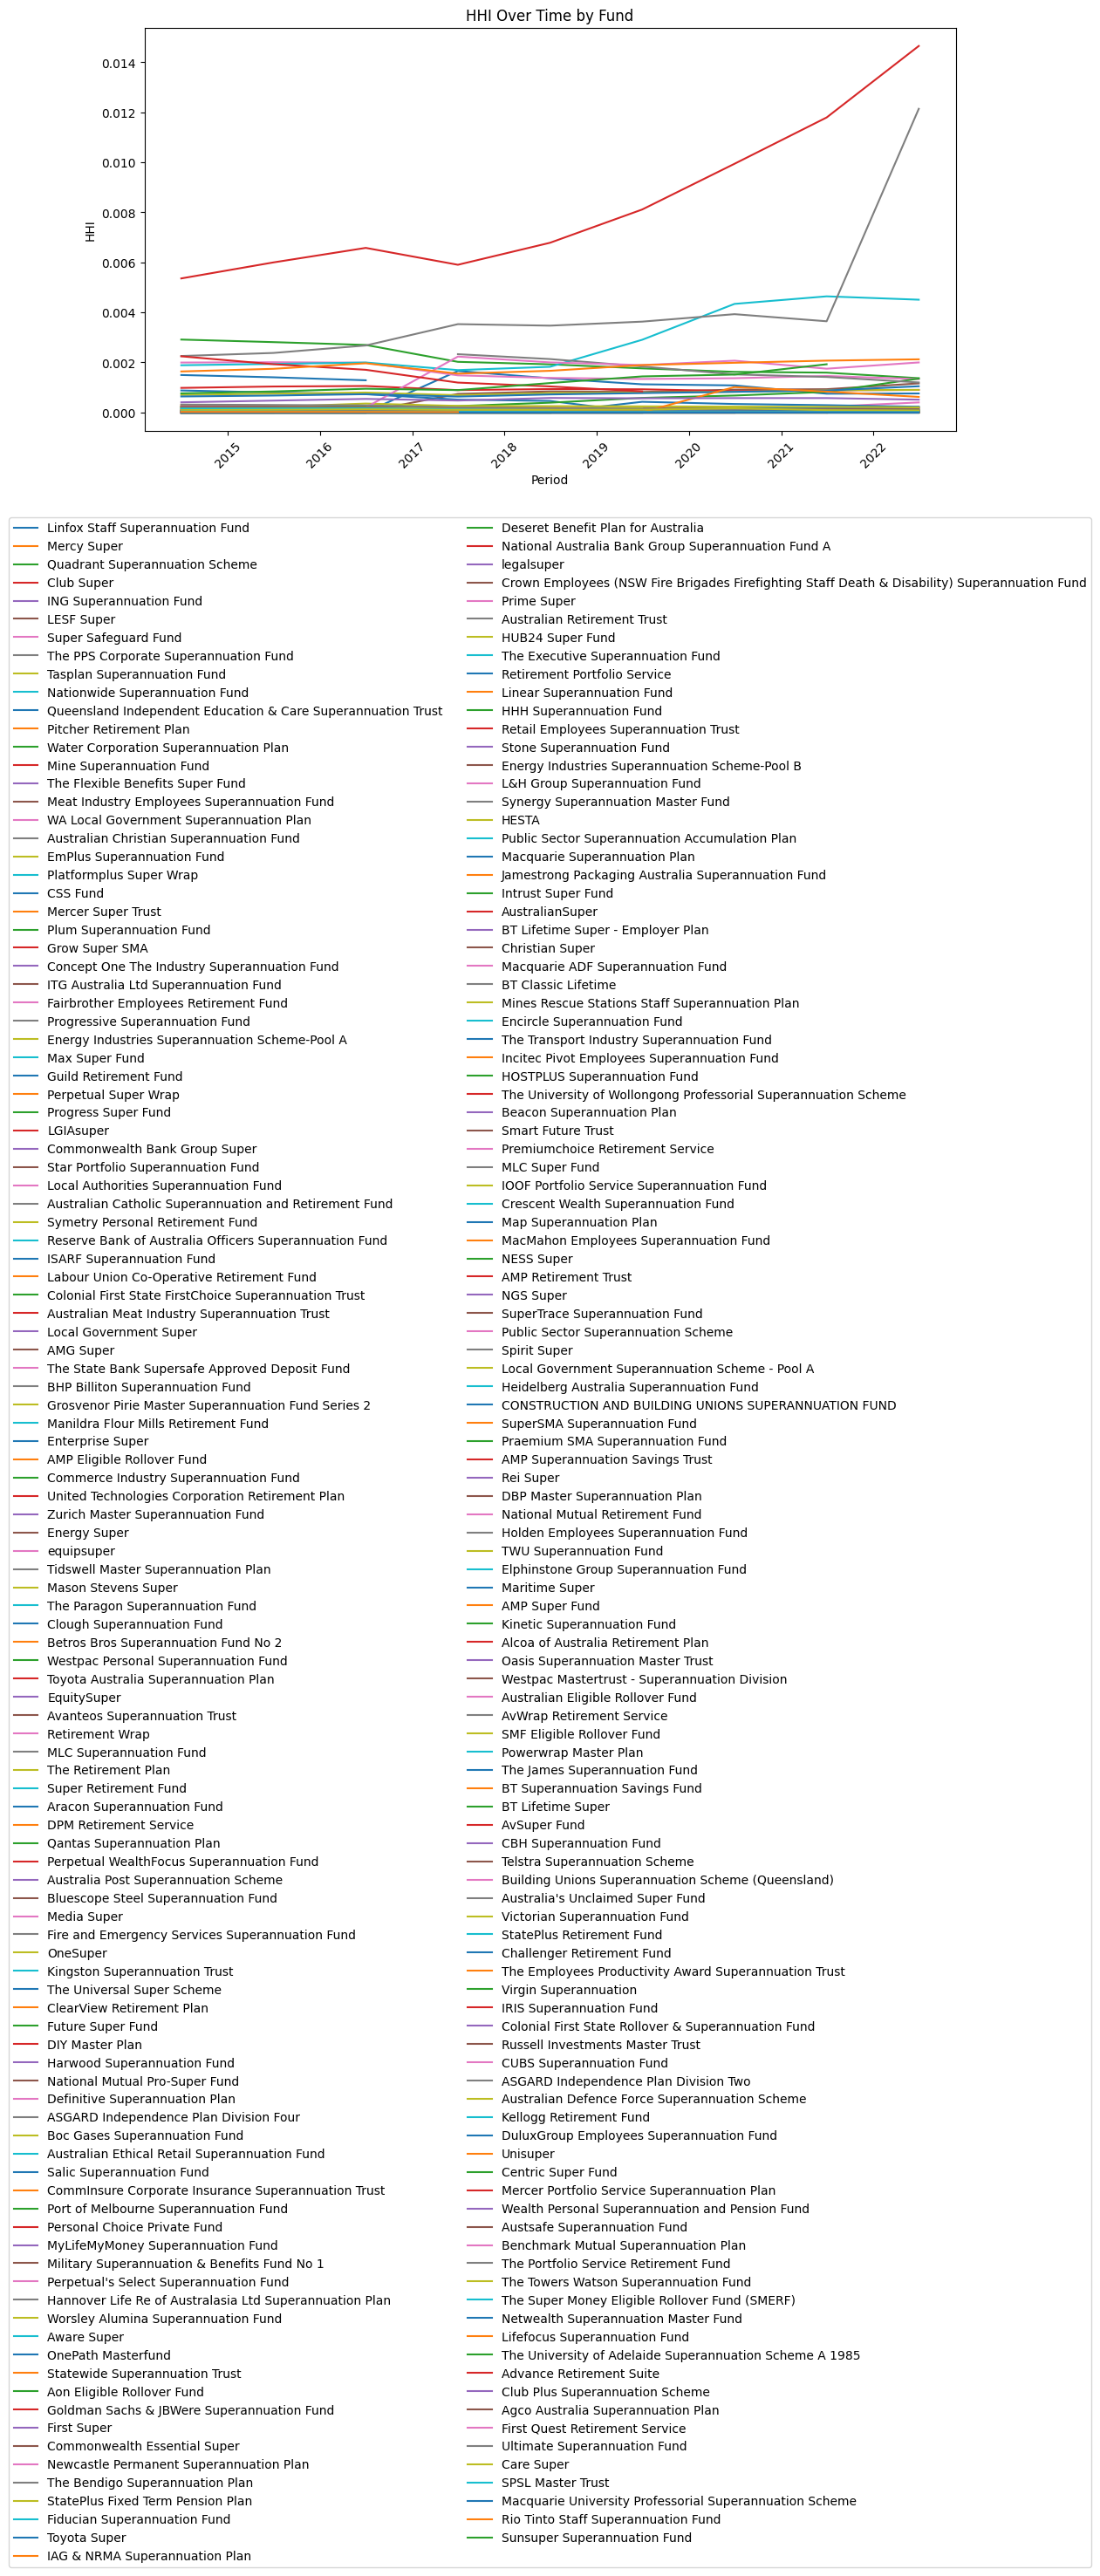

In [20]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Group by 'ABN' and 'Fund name' to plot HHI by fund over time
grouped = hhi_by_fund.groupby(['ABN', 'Fund name'])

# Plot HHI over time for each fund
for name, group in grouped:
    ax.plot(group['Period'], group['HHI'], label=name[1])  # Use name[1] for the fund name

# Set labels and title
ax.set_xlabel('Period')
ax.set_ylabel('HHI')
ax.set_title('HHI Over Time by Fund')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Add legend below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Show the plot
plt.tight_layout()
plt.show()

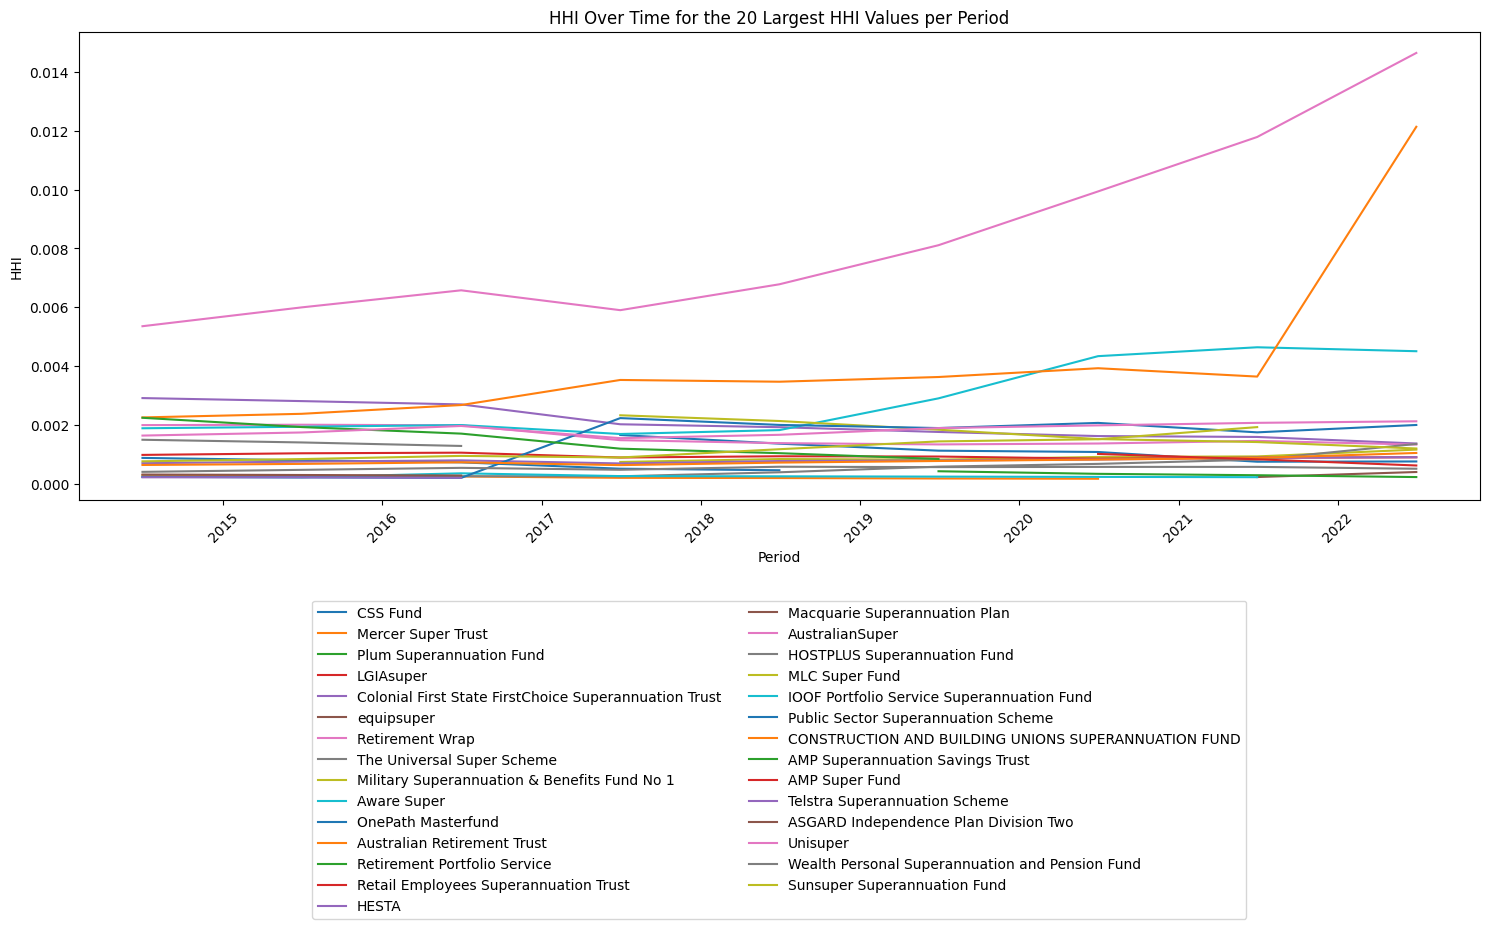

In [21]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Group by 'Period' and select the top 20 HHI values for each period
top_20_hhi_by_period = hhi_by_fund.groupby('Period').apply(lambda group: group.nlargest(20, 'HHI'))

# Group the top 20 HHI values by 'ABN' and 'Fund name' to plot HHI by fund over time for the top 20 HHI values in each period
grouped = top_20_hhi_by_period.groupby(['ABN', 'Fund name'])

# Plot HHI over time for each of the top 20 HHI values in each period
for name, group in grouped:
    ax.plot(group['Period'], group['HHI'], label=name[1])  # Use name[1] for the fund name

# Set labels and title
ax.set_xlabel('Period')
ax.set_ylabel('HHI')
ax.set_title('HHI Over Time for the 20 Largest HHI Values per Period')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Add legend below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Show the plot
plt.tight_layout()
plt.show()

Calculating HHI Using Net Assets

In [28]:
mergers

,Period,Fund name,ABN,Merger,Merged,Net assets at beginning of period
0,2022-06-30,Australian Retirement Trust,60905115063,1,0,132912715
1,2021-06-30,equipsuper,33813823017,1,0,15751360
2,2019-06-30,Smart Future Trust,68964712340,1,0,3411853
3,2019-06-30,Russell Investments Master Trust,89384753567,1,0,8710803
4,2011-06-30,Aware Super,53226460365,1,0,13884695
...,...,...,...,...,...,...
745,2009-06-30,Russell Investments Master Trust,89384753567,0,0,3383176
746,2009-06-30,Rio Tinto Staff Superannuation Fund,98438661856,0,0,2381439
747,2009-06-30,Retirement Portfolio Service,61808189263,0,0,1125067
748,2009-06-30,Reserve Bank of Australia Officers Superannuat...,25303030489,0,0,896551


In [29]:
# Convert the 'Net assets at beginning of period' column to numeric (if not already)
mergers['Net assets at beginning of period'] = pd.to_numeric(mergers['Net assets at beginning of period'], errors='coerce')

# Calculate the total assets per period
total_assets_per_period = mergers.groupby('Period')['Net assets at beginning of period'].sum().reset_index()
total_assets_per_period.rename(columns={'Net assets at beginning of period': 'Total assets per period'}, inplace=True)

# Merge this back into the original DataFrame
mergers = pd.merge(mergers, total_assets_per_period, on='Period', how='left')

# Function to calculate HHI for each group
def calculate_hhi(group):
    total_assets = group['Total assets per period'].iloc[0]  # Total assets for the period
    group['Market Share'] = group['Net assets at beginning of period'] / total_assets
    hhi = (group['Market Share'] ** 2).sum()
    return hhi

# Calculate HHI for each firm per period
hhi_by_firm_per_period = mergers.groupby(['Period', 'ABN', 'Fund name']).apply(calculate_hhi).reset_index(name='HHI')

# Display the resulting DataFrame with HHI values
print(hhi_by_firm_per_period)

        Period          ABN  \
0   2004-06-30  12727521796   
1   2004-06-30  12737334298   
2   2004-06-30  14602032302   
3   2004-06-30  15201768813   
4   2004-06-30  15549636673   
..         ...          ...   
745 2022-06-30  73549180515   
746 2022-06-30  74559365913   
747 2022-06-30  75493363262   
748 2022-06-30  89384753567   
749 2022-06-30  98350952022   

                                             Fund name       HHI  
0                       Quadrant Superannuation Scheme  0.000012  
1                                           Club Super  0.000003  
2                          Tasplan Superannuation Fund  0.000038  
3                       Nationwide Superannuation Fund  0.000010  
4    Queensland Independent Education & Care Supera...  0.000008  
..                                                 ...       ...  
745                                          NGS Super  0.000274  
746                                       Spirit Super  0.000990  
747  CONSTRUCTION AND BU

/var/folders/1p/89s8czgd3m7f_535cwnrk58c0000gn/T/ipykernel_68073/3928502922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergers['Net assets at beginning of period'] = pd.to_numeric(mergers['Net assets at beginning of period'], errors='coerce')


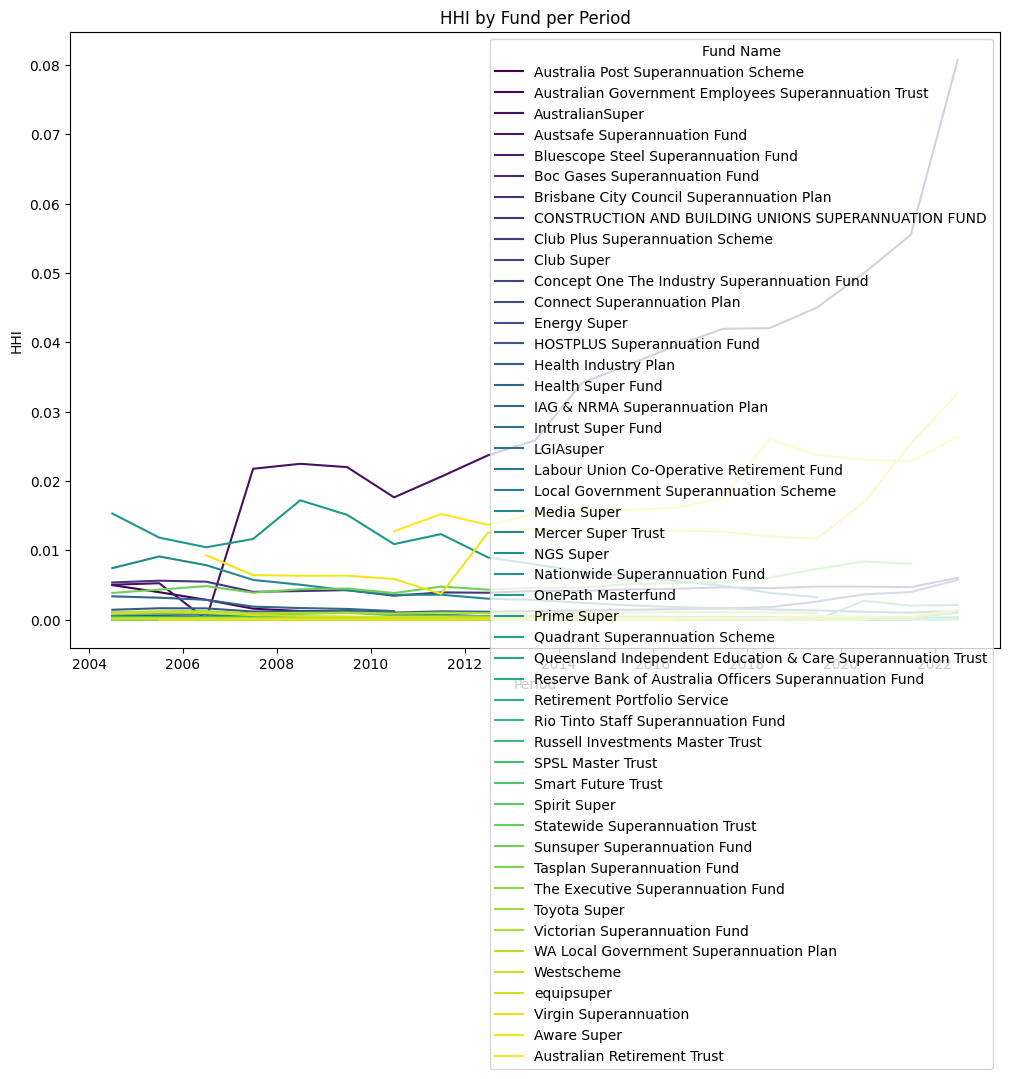

In [30]:
# Sort the DataFrame for better visualization
hhi_by_firm_per_period.sort_values(['Period', 'Fund name'], inplace=True)

# Create a color map for unique Fund names
colors = plt.cm.viridis(np.linspace(0, 1, len(hhi_by_firm_per_period['Fund name'].unique())))

# Create a dictionary to map Fund names to colors
fund_color_map = {fund: color for fund, color in zip(hhi_by_firm_per_period['Fund name'].unique(), colors)}

# Create the plot
plt.figure(figsize=(12, 8))

# Loop through each unique fund name and plot its HHI over time
for fund_name, color in fund_color_map.items():
    fund_data = hhi_by_firm_per_period[hhi_by_firm_per_period['Fund name'] == fund_name]
    plt.plot(fund_data['Period'], fund_data['HHI'], label=fund_name, color=color)

# Create a custom legend with no duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Fund Name')

# Label the axes
plt.xlabel('Period')
plt.ylabel('HHI')
plt.title('HHI by Fund per Period')

# Show the plot
plt.show()

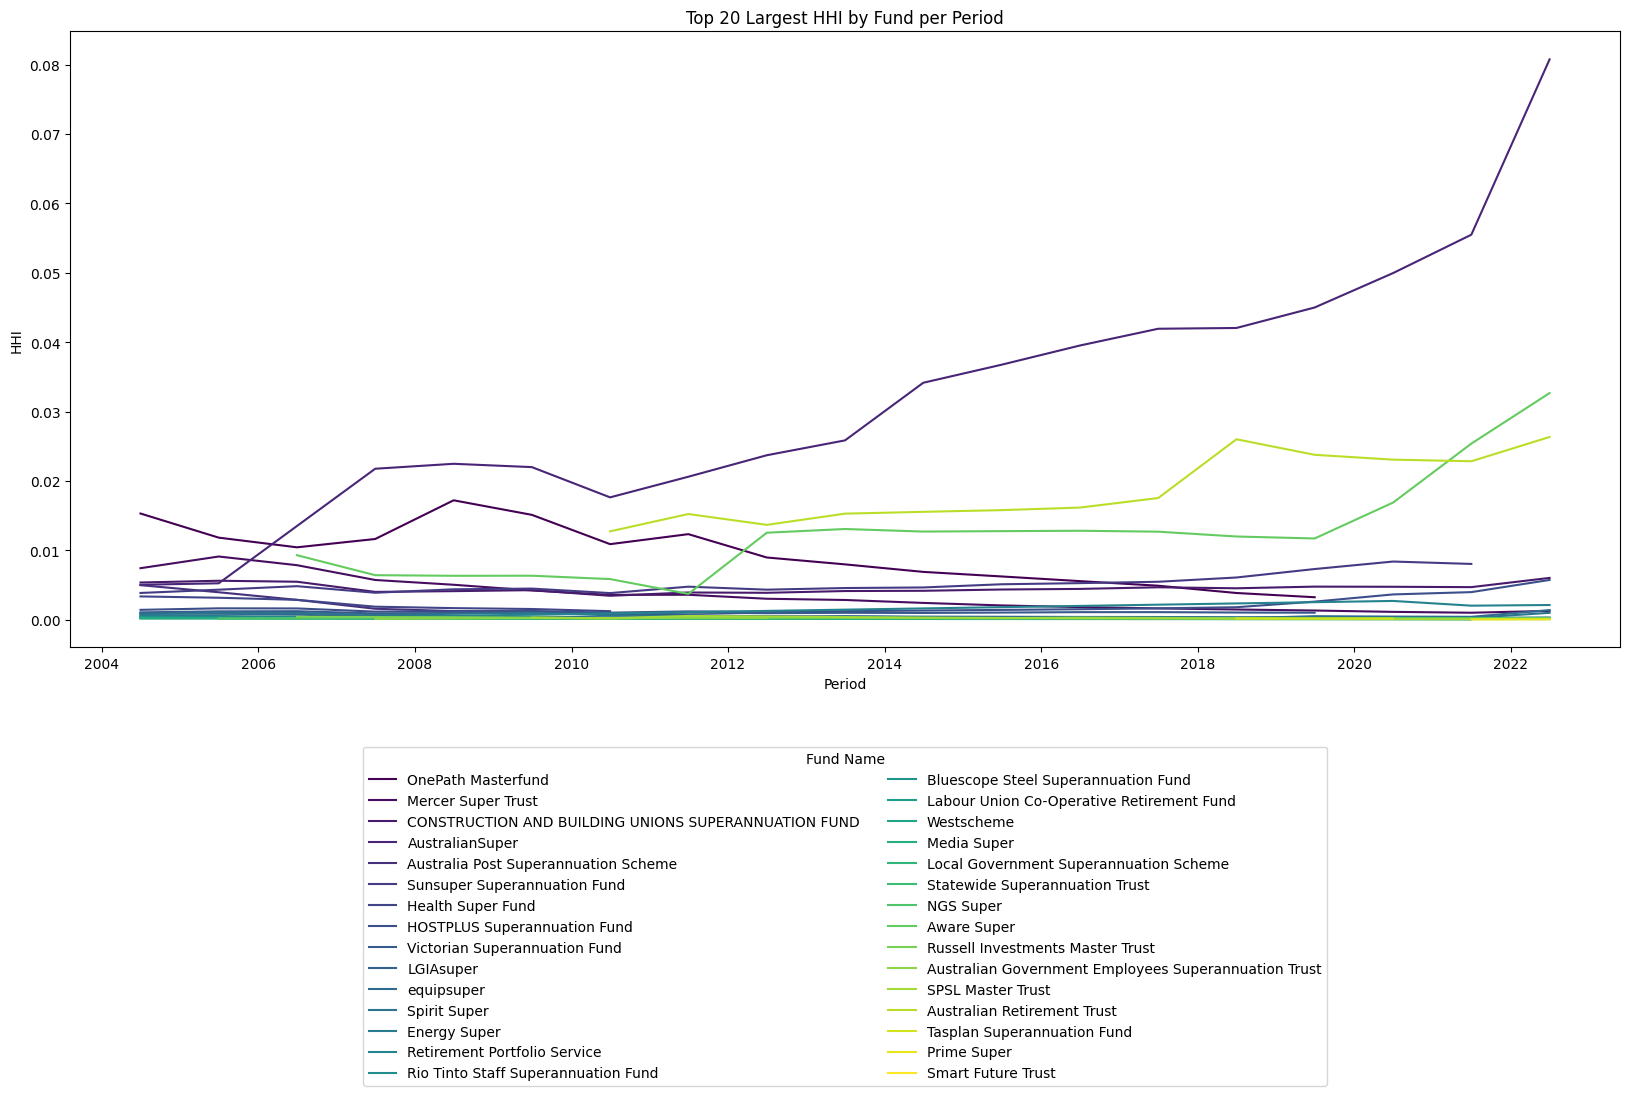

In [31]:

# Sort the DataFrame for better visualization
hhi_by_firm_per_period.sort_values(['Period', 'HHI'], ascending=[True, False], inplace=True)

# Keep only the top 10 largest HHI per period
top_10_hhi_per_period = hhi_by_firm_per_period.groupby('Period').head(20).reset_index(drop=True)

# Create a color map for unique Fund names
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_hhi_per_period['Fund name'].unique())))

# Create a dictionary to map Fund names to colors
fund_color_map = {fund: color for fund, color in zip(top_10_hhi_per_period['Fund name'].unique(), colors)}

# Create the plot
plt.figure(figsize=(20, 8))

# Loop through each unique fund name and plot its HHI over time
for fund_name, color in fund_color_map.items():
    fund_data = top_10_hhi_per_period[top_10_hhi_per_period['Fund name'] == fund_name]
    plt.plot(fund_data['Period'], fund_data['HHI'], label=fund_name, color=color)

# Create a custom legend with no duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Fund Name', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Label the axes
plt.xlabel('Period')
plt.ylabel('HHI')
plt.title('Top 20 Largest HHI by Fund per Period')

# Show the plot
plt.show()


Plotting Mergers

In [ ]:
fund_profile_merged

In [ ]:
fund_profile_merged.columns

In [24]:
# Create the 'mergers' DataFrame with selected columns
mergers = fund_profile_merged[['Period', 'Fund name', 'ABN', 'Merger', 'Merged', 'Total assets']]

# Display the first few rows of the 'mergers' DataFrame
print(mergers.head())

      Period                         Fund name          ABN  Merger  Merged  \
0 2022-06-30       Australian Retirement Trust  60905115063       1       0   
1 2021-06-30                        equipsuper  33813823017       1       0   
2 2019-06-30                Smart Future Trust  68964712340       1       0   
3 2019-06-30  Russell Investments Master Trust  89384753567       1       0   
4 2019-06-30                         NGS Super  73549180515       1       0   

   Total assets  
0     247360562  
1      33898889  
2       5415697  
3       9483982  
4      11655150  


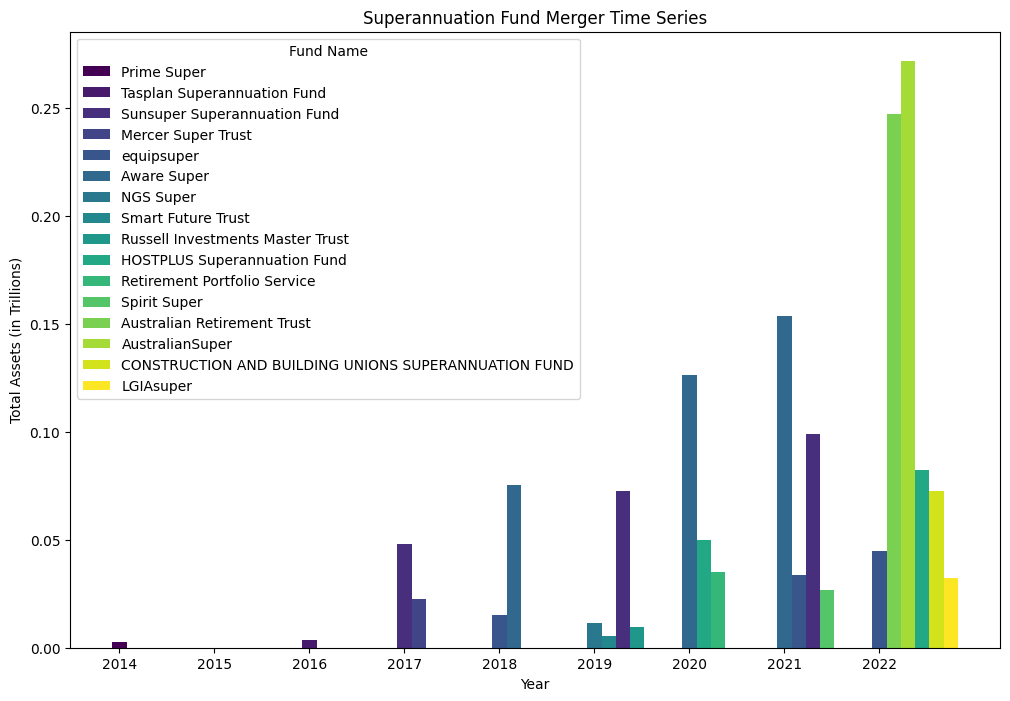

<Figure size 640x480 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming fund_profile_merged is your DataFrame
# fund_profile_merged = pd.read_csv("your_data.csv")

# Filter the DataFrame to only include rows where 'Merger' is 1
filtered_df = fund_profile_merged[fund_profile_merged['Merger'] == 1].copy()

# Convert 'Period' to datetime and extract the year for plotting
filtered_df['Year'] = pd.to_datetime(filtered_df['Period']).dt.year

# Sort by Year for better visualization
filtered_df.sort_values('Year', inplace=True)

# Create a color map for unique Fund names
colors = plt.cm.viridis(np.linspace(0, 1, len(filtered_df['Fund name'].unique())))

# Create a dictionary to map Fund names to colors
fund_color_map = {fund: color for fund, color in zip(filtered_df['Fund name'].unique(), colors)}

# Create the plot
plt.figure(figsize=(12, 8))

# Create an array of years from 2014 to 2022
years = np.arange(2014, 2023)

# Bar width
bar_width = 0.15

# Loop through each year and plot bars for that year
for i, year in enumerate(years):
    year_data = filtered_df[filtered_df['Year'] == year]
    for j, (index, row) in enumerate(year_data.iterrows()):
        plt.bar(i + j * bar_width, row['Total assets'] / 1e9, width=bar_width, color=fund_color_map[row['Fund name']], label=row['Fund name'])

# Create a custom legend with no duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Fund Name')

# Label the axes
plt.xlabel('Year')
plt.ylabel('Total Assets (in Trillions)')
plt.title('Superannuation Fund Merger Time Series')

# Set xticks to represent years
plt.xticks(np.arange(len(years)), [str(year) for year in years])

# Show the plot
plt.show()
plt.savefig('Annual Merger Time Series.png')

In [27]:
# Create the 'mergers' DataFrame with selected columns
mergers = financial_performance_merged[['Period', 'Fund name', 'ABN', 'Merger', 'Merged', 'Net assets at beginning of period']]

# Display the first few rows of the 'mergers' DataFrame
print(mergers.head())

      Period                         Fund name          ABN  Merger  Merged  \
0 2022-06-30       Australian Retirement Trust  60905115063       1       0   
1 2021-06-30                        equipsuper  33813823017       1       0   
2 2019-06-30                Smart Future Trust  68964712340       1       0   
3 2019-06-30  Russell Investments Master Trust  89384753567       1       0   
4 2011-06-30                       Aware Super  53226460365       1       0   

   Net assets at beginning of period  
0                          132912715  
1                           15751360  
2                            3411853  
3                            8710803  
4                           13884695  


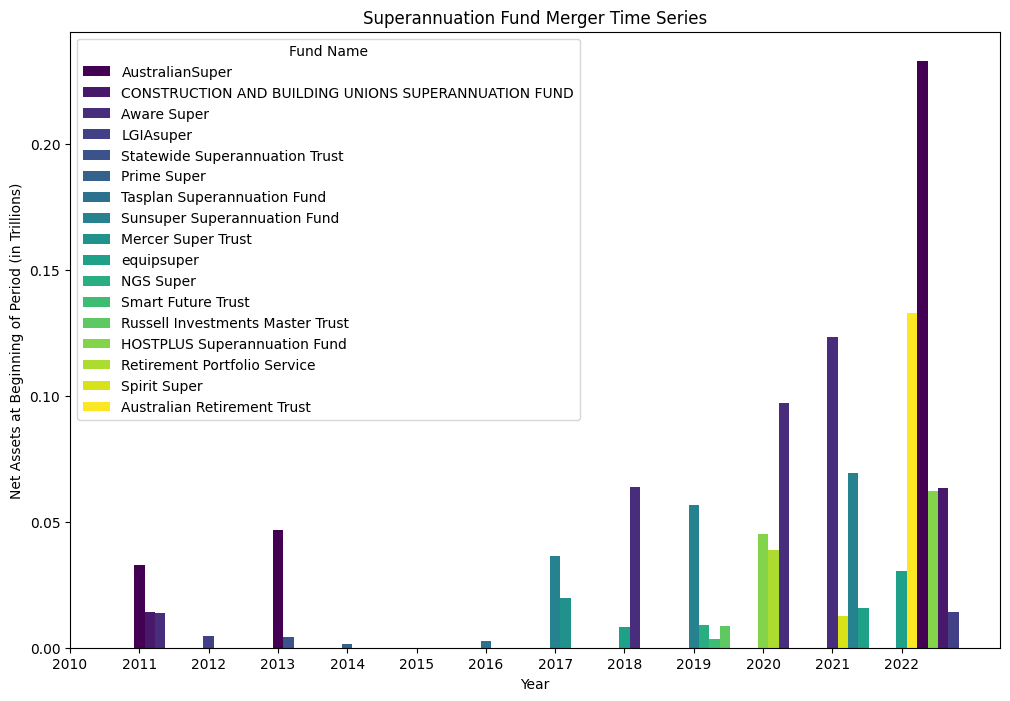

<Figure size 640x480 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming financial_performance_merged is your DataFrame
# financial_performance_merged = pd.read_csv("your_data.csv")

# Filter the DataFrame to only include rows where 'Merger' is 1
filtered_df = financial_performance_merged[financial_performance_merged['Merger'] == 1].copy()

# Convert 'Period' to datetime and extract the year for plotting
filtered_df['Year'] = pd.to_datetime(filtered_df['Period']).dt.year

# Sort by Year for better visualization
filtered_df.sort_values('Year', inplace=True)

# Create a color map for unique Fund names
colors = plt.cm.viridis(np.linspace(0, 1, len(filtered_df['Fund name'].unique())))

# Create a dictionary to map Fund names to colors
fund_color_map = {fund: color for fund, color in zip(filtered_df['Fund name'].unique(), colors)}

# Create the plot
plt.figure(figsize=(12, 8))

# Create an array of years from 2010 to 2023
years = np.arange(2010, 2023)

# Bar width
bar_width = 0.15

# Loop through each year and plot bars for that year
for i, year in enumerate(years):
    year_data = filtered_df[filtered_df['Year'] == year]
    for j, (index, row) in enumerate(year_data.iterrows()):
        plt.bar(i + j * bar_width, row['Net assets at beginning of period'] / 1e9, width=bar_width, color=fund_color_map[row['Fund name']], label=row['Fund name'])

# Create a custom legend with no duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Fund Name')

# Label the axes
plt.xlabel('Year')
plt.ylabel('Net Assets at Beginning of Period (in Trillions)')
plt.title('Superannuation Fund Merger Time Series')

# Set xticks to represent years
plt.xticks(np.arange(len(years)), [str(year) for year in years])

# Show the plot
plt.show()
plt.savefig('Annual Merger Time Series Net Assets.png')

Industry Concentration

In [ ]:
# Group by 'Period' and sum the HHI values to get the market-wide HHI for each period
market_hhi = hhi_by_fund.groupby('Period')['HHI'].sum().reset_index()

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot HHI over time for the market
ax.plot(market_hhi['Period'], market_hhi['HHI'], marker='o')

# Set labels and title
ax.set_xlabel('Period')
ax.set_ylabel('Market-wide HHI')
ax.set_title('Market-wide HHI Over Time')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
plt.savefig('Market HHI.png')

In [ ]:
# Group by 'Period' and sort by 'Market Share' in descending order
grouped = new_fund_profile.groupby('Period').apply(lambda x: x.sort_values('Market Share', ascending=False)).reset_index(drop=True)

# Take the top 10 funds for each period and sum their market shares
concentration_ratio = grouped.groupby('Period').apply(lambda x: x.head(10)['Market Share'].sum()).reset_index(name='Top 10 Concentration Ratio')

# Drop NaN values
concentration_ratio.dropna(inplace=True)

# Plot the concentration ratio
plt.figure(figsize=(10, 6))
plt.plot(concentration_ratio['Period'], concentration_ratio['Top 10 Concentration Ratio'], marker='o')
plt.title('Concentration Ratio of Top 10 Funds Over Time')
plt.xlabel('Period')
plt.ylabel('Top 10 Concentration Ratio (%)')
plt.grid(True)
plt.show()
plt.savefig('Concentration Ratio Top 10.png')

In [ ]:
# Calculate the Rosenbluth Index (which is essentially HHI but in percentage form)
rosenbluth_index = new_fund_profile.groupby('Period').apply(lambda x: ((x['Market Share'] ** 2).sum())).reset_index(name='Rosenbluth Index')

# Drop NaN values
rosenbluth_index.dropna(inplace=True)

# Plot the Rosenbluth Index
plt.figure(figsize=(10, 6))
plt.plot(rosenbluth_index['Period'], rosenbluth_index['Rosenbluth Index'], marker='x')
plt.title('Rosenbluth Index Over Time')
plt.xlabel('Period')
plt.ylabel('Rosenbluth Index')
plt.grid(True)
plt.show()
plt.savefig('Rosenbluth.png')

In [ ]:
# Merge the HHI values into new_fund_profile
new_fund_profile = pd.merge(new_fund_profile, hhi_by_fund, on=['Period', 'ABN', 'Fund name'], how='left')

# Calculate CCI for each period
def calculate_cci(group):
    hhi = group['HHI'].iloc[0]  # HHI for the period
    cci = (group['Market Share'] ** 2 * hhi).sum()
    return cci

cci_by_period = new_fund_profile.groupby('Period').apply(calculate_cci).reset_index(name='CCI')

# Drop NaN values
cci_by_period.dropna(inplace=True)

# Plot the CCI
plt.figure(figsize=(10, 6))
plt.plot(cci_by_period['Period'], cci_by_period['CCI'], marker='o')
plt.title('Comprehensive Concentration Index (CCI) Over Time')
plt.xlabel('Period')
plt.ylabel('CCI')
plt.grid(True)
plt.show()
plt.savefig('CCI.png')

## FInal Thesis Graphs

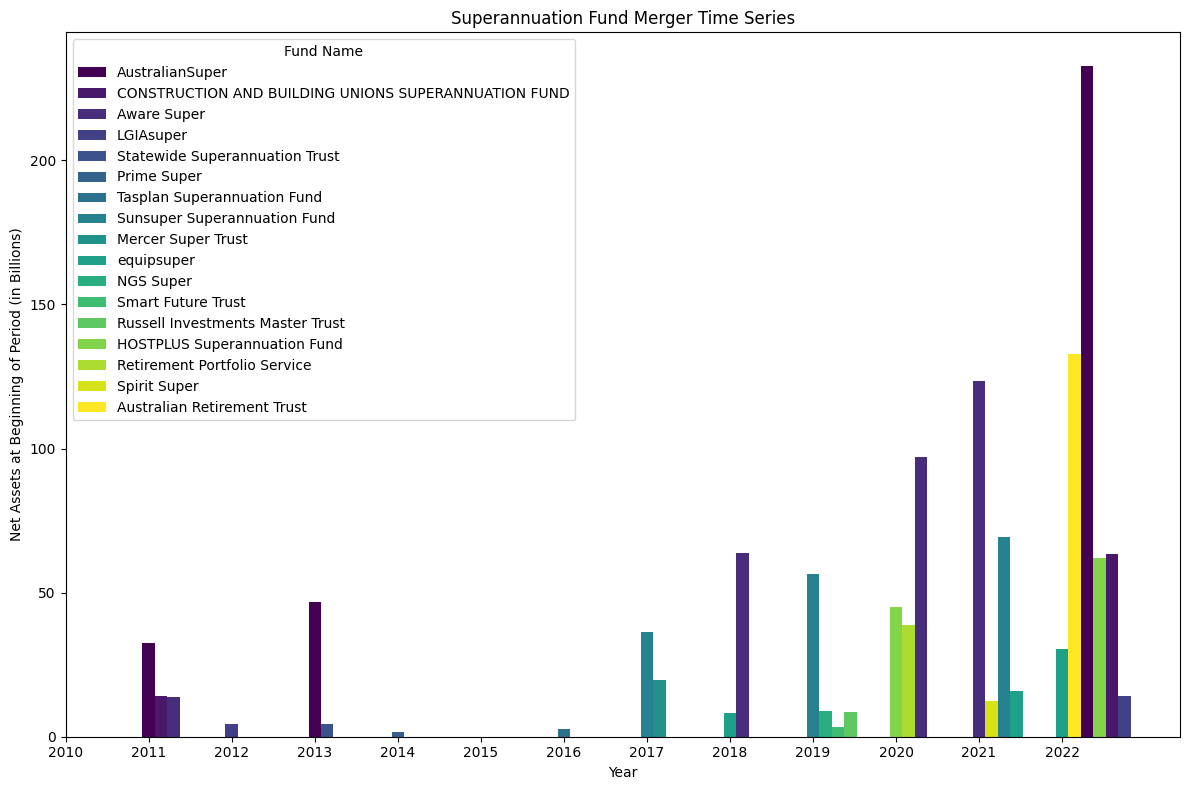

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming financial_performance_merged is your DataFrame
# financial_performance_merged = pd.read_csv("your_data.csv")

# Filter the DataFrame to only include rows where 'Merger' is 1
filtered_df = financial_performance_merged[financial_performance_merged['Merger'] == 1].copy()

# Convert 'Period' to datetime and extract the year for plotting
filtered_df['Year'] = pd.to_datetime(filtered_df['Period']).dt.year

# Sort by Year for better visualization
filtered_df.sort_values('Year', inplace=True)

# Create a color map for unique Fund names
colors = plt.cm.viridis(np.linspace(0, 1, len(filtered_df['Fund name'].unique())))

# Create a dictionary to map Fund names to colors
fund_color_map = {fund: color for fund, color in zip(filtered_df['Fund name'].unique(), colors)}

# Create the plot
plt.figure(figsize=(12, 8))

# Create an array of years from 2010 to 2023
years = np.arange(2010, 2023)

# Bar width
bar_width = 0.15

# Loop through each year and plot bars for that year
for i, year in enumerate(years):
    year_data = filtered_df[filtered_df['Year'] == year]
    for j, (index, row) in enumerate(year_data.iterrows()):
        plt.bar(i + j * bar_width, row['Net assets at beginning of period'] / 1e6, width=bar_width, color=fund_color_map[row['Fund name']], label=row['Fund name'])

# Create a custom legend with no duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Fund Name')

# Label the axes
plt.xlabel('Year')
plt.ylabel('Net Assets at Beginning of Period (in Billions)')
plt.title('Superannuation Fund Merger Time Series')

# Set xticks to represent years
plt.xticks(np.arange(len(years)), [str(year) for year in years])

# Save the plot as a PDF
plt.tight_layout()
plt.savefig('Annual Merger Time Series Net Assets.pdf')

# Show the plot
plt.show()


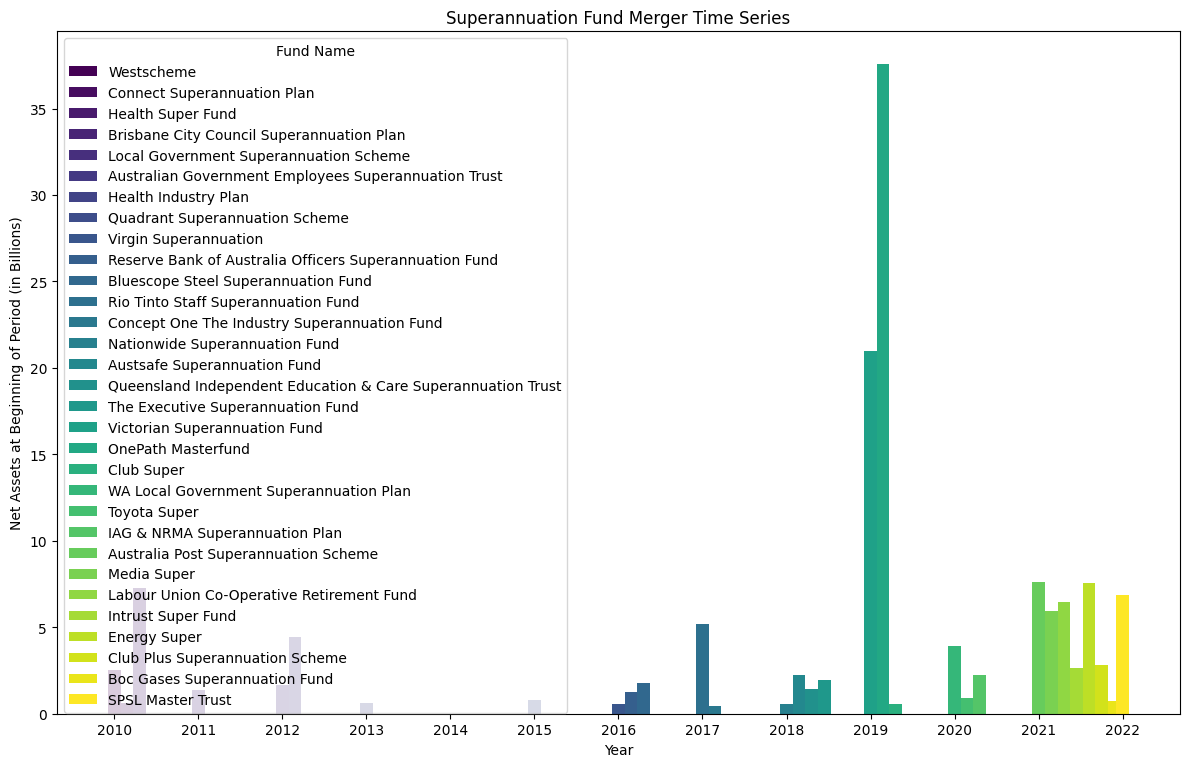

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming financial_performance_merged is your DataFrame
# financial_performance_merged = pd.read_csv("your_data.csv")

# Filter the DataFrame to only include rows where 'Merger' is 1
merged_df = financial_performance_merged[financial_performance_merged['Merged'] == 1].copy()

# Convert 'Period' to datetime and extract the year for plotting
merged_df['Year'] = pd.to_datetime(merged_df['Period']).dt.year

# Sort by Year for better visualization
merged_df.sort_values('Year', inplace=True)

# Create a color map for unique Fund names
colors = plt.cm.viridis(np.linspace(0, 1, len(merged_df['Fund name'].unique())))

# Create a dictionary to map Fund names to colors
fund_color_map = {fund: color for fund, color in zip(merged_df['Fund name'].unique(), colors)}

# Create the plot
plt.figure(figsize=(12, 8))

# Create an array of years from 2010 to 2023
years = np.arange(2010, 2023)

# Bar width
bar_width = 0.15

# Loop through each year and plot bars for that year
for i, year in enumerate(years):
    year_data = merged_df[merged_df['Year'] == year]
    for j, (index, row) in enumerate(year_data.iterrows()):
        plt.bar(i + j * bar_width, row['Net assets at beginning of period'] / 1e6, width=bar_width, color=fund_color_map[row['Fund name']], label=row['Fund name'])

# Create a custom legend with no duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Fund Name')

# Label the axes
plt.xlabel('Year')
plt.ylabel('Net Assets at Beginning of Period (in Billions)')
plt.title('Superannuation Fund Merger Time Series')

# Set xticks to represent years
plt.xticks(np.arange(len(years)), [str(year) for year in years])

# Save the plot as a PDF
plt.tight_layout()
#plt.savefig('Merged Funds Time Series Net Assets.pdf')

# Show the plot
plt.show()
